##***Automatic Grading System***

Objective is to grade essay using NLP

##**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding
from nltk.corpus import stopwords
import nltk
import seaborn as sns 

##**Importing Data**

In [2]:
data=pd.read_csv('/content/essays_and_scores.csv',error_bad_lines=False, engine="python")

In [3]:
np.isfinite(data['rater1_domain1']).all()

False

##**Data Preprocessing**

In [4]:
data.replace([np.inf, -np.inf], np.nan, inplace=True) 
data.dropna(inplace=True) 

In [5]:
data = data[data.essay_set<7]

In [6]:
data['essay_set'].unique()

array([1, 2, 3, 4, 5, 6])

In [7]:
data=data.drop(['essay_id', 'essay_set','rater2_domain1','domain1_score'], axis = 1) 

##**Exploratory Data Analysis**

**Univariate Analysis**

In [8]:
data.head()

,essay,rater1_domain1
0,"Dear local newspaper, I think effects computer...",4.0
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0
3,"Dear Local Newspaper, @CAPS1 I have found that...",5.0
4,"Dear @LOCATION1, I know having computers has a...",4.0


In [9]:
data["Length"]= data["essay"].str.len() 

In [10]:
data.dtypes

essay              object
rater1_domain1    float64
Length              int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10685 entries, 0 to 10685
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay           10685 non-null  object 
 1   rater1_domain1  10685 non-null  float64
 2   Length          10685 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 333.9+ KB


In [12]:
data.describe()

,rater1_domain1,Length
count,10685.000000,10685.000000
mean,2.592981,1137.423117
std,1.326475,848.107484
min,0.000000,8.000000
25%,2.000000,507.000000
50%,3.000000,873.000000
75%,4.000000,1594.000000
max,6.000000,6098.000000


In [13]:
data.rater1_domain1.value_counts()

3.0    2746
2.0    2550
4.0    2159
1.0    2060
5.0     582
0.0     461
6.0     127
Name: rater1_domain1, dtype: int64

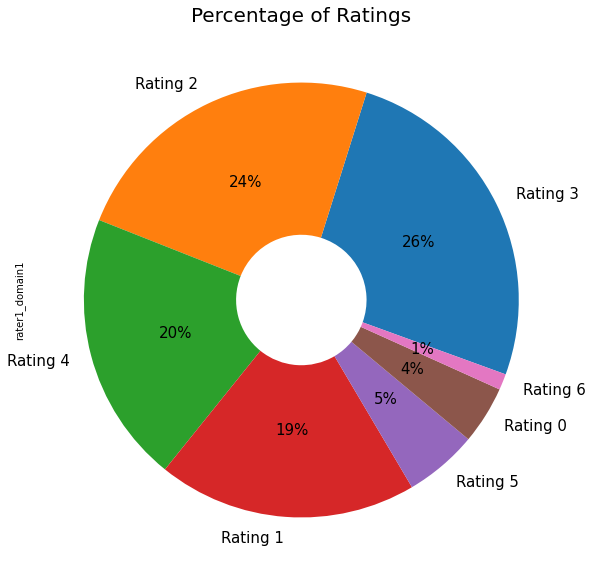

In [14]:
plt.figure(figsize=(10,10))
plt.title('Percentage of Ratings', fontsize=20)
data.rater1_domain1.value_counts().plot(kind='pie', labels=['Rating 3', 'Rating 2', 'Rating 4', 'Rating 1', 'Rating 5','Rating 0','Rating 6'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [15]:
nltk.download('stopwords')
stoplist = stopwords.words('english')
word = data['essay']
data['essay'].apply(lambda x: [item for item in x if item not in stoplist])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [D, e, r,  , l, c, l,  , n, e, w, p, p, e, r, ...
1        [D, e, r,  , @, C, A, P, S, 1,  , @, C, A, P, ...
2        [D, e, r, ,,  , @, C, A, P, S, 1,  , @, C, A, ...
3        [D, e, r,  , L, c, l,  , N, e, w, p, p, e, r, ...
4        [D, e, r,  , @, L, O, C, A, T, I, O, N, 1, ,, ...
                               ...                        
10681    [T, h, e,  , n, e,  , b, c, l, e,  , h, e,  , ...
10682    [S, e,  , f,  , h, e,  , p, r, b, l, e,  , w, ...
10683    [T, h, e,  , b, u, l, e, r,  , f,  , h, e,  , ...
10684    [T, h, e,  , b, c, l, e,  , h, e,  , b, u, l, ...
10685    [Y, u,  , w, n,  , e,  ,  , e, l, l,  , u,  , ...
Name: essay, Length: 10685, dtype: object

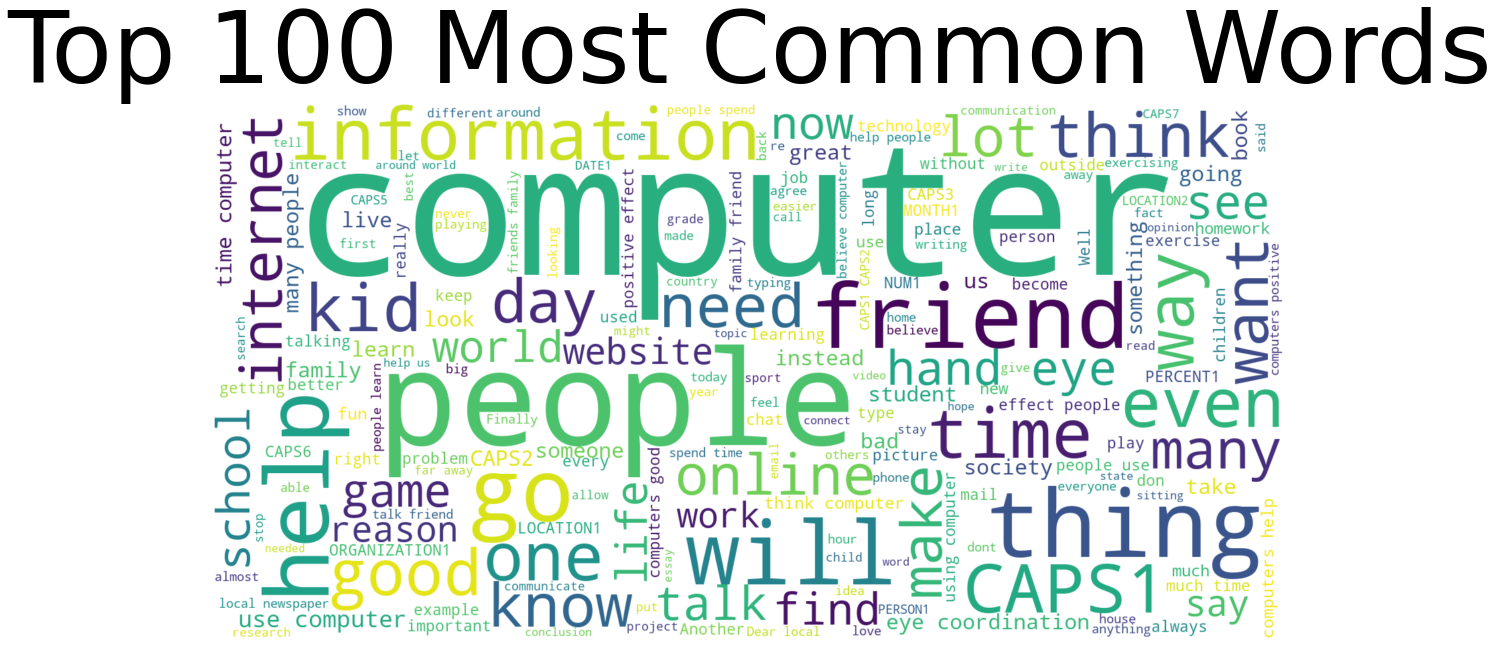

In [16]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.probability import FreqDist
words = data['essay']

words=words.astype(str)
mostcommon = FreqDist(words).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


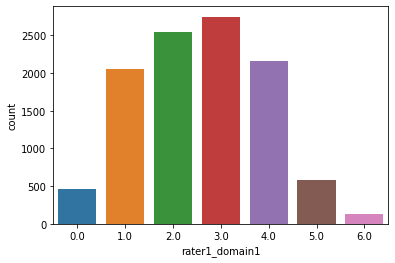

In [17]:
sns.countplot('rater1_domain1',data=data)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


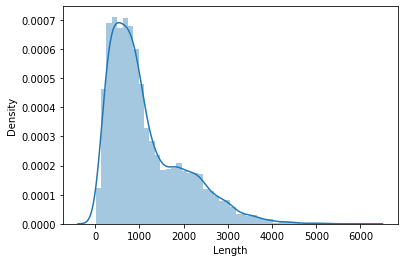

In [18]:
sns.distplot(data['Length'].dropna(),kde=True)

**Bivariate Analysis**

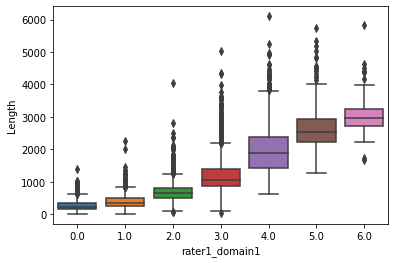

In [19]:
sns.boxplot(x="rater1_domain1", y="Length", data=data)

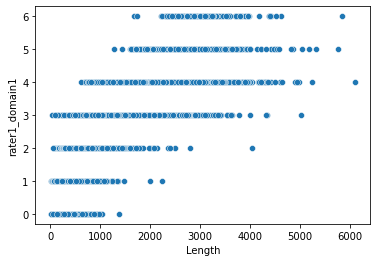

In [20]:
sns.scatterplot(data=data, x="Length", y="rater1_domain1")

##**Converting text data to integer**

In [21]:
X = data['essay'] 
y = data['rater1_domain1']

In [22]:
X = X.astype(str)
X=X.to_numpy()
y=y.to_numpy()

In [23]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split( X, y, test_size=0.3, random_state=42)

In [24]:
vocab_size=40000 
embedding_dim=16
max_length=60000
trunc_type='post' # It can be changed to pre and then see the diffrence in accuracy
oov_tok='<OOV>'

In [25]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [26]:

word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)

In [27]:
print(sequences[0])
print(training_sentences[0])

[2, 75, 6, 469, 204, 1312, 1065, 941, 2, 85, 8, 21, 80, 3, 253, 2, 1526, 6, 1022, 110, 70, 408, 1874, 3, 2, 1526, 6, 1022, 110, 53, 327, 5149, 917, 2685, 39, 728, 36, 971, 479, 307, 3, 95, 10, 190, 2, 469, 1562, 42, 1697, 9205, 366, 17, 5, 7636, 16, 2, 72, 1022, 32, 284, 202, 8, 219, 7, 219, 137, 22, 13, 39, 728, 36, 10, 47, 1009, 130, 9, 42, 1697, 70, 366, 12420, 70, 6028, 3633, 33, 1022, 7637, 48, 2, 472, 204, 64, 13, 656, 12421, 6, 3129, 421, 10, 9, 3130, 4, 510, 23, 2, 2430, 2, 72, 9, 3130, 8, 68, 5, 51, 72, 135, 98, 20, 83, 163, 72, 415, 84, 312, 12, 12422, 39, 5, 51, 72, 7, 257, 22, 12423, 7, 12, 19, 634, 32, 1655, 130, 9, 104, 2, 75, 297, 336, 33, 5, 478, 7, 9, 457, 51, 163, 62, 45, 157]
The author of winter Hibiscus , Minfong Ho ended the story in this way to show the theme of starting over. Her mother adds to the theme of starting over by saying. �Its flowers aren�t as pretty but it�s strong enough to make it through the winter. That�s what matters. �Her words are a metaphor f

In [28]:
padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

In [29]:
print(sequences[500])
print(padded[500])

[17, 61, 251, 173, 39, 41, 127, 186, 43, 13, 275, 40, 2, 203, 27, 187, 66, 17, 241, 6800, 30, 17, 61, 66, 8, 41, 17, 127, 7, 17, 79, 4, 7, 91, 797, 353, 1208, 259, 24, 82, 191, 5, 69, 48, 178, 352, 33, 192, 1183, 7, 17, 79, 36, 55, 2, 229, 67, 25, 11, 136, 40, 88, 66, 173, 39, 936, 10, 8, 5, 69, 24, 540, 10, 15, 1555, 37, 14, 237, 57, 7, 192, 66, 7, 17, 241, 13511, 43, 13, 272, 131, 2, 203, 26, 18, 43, 136, 131, 6, 88, 66, 61, 18, 19, 5, 300, 67, 1503, 1246, 146, 4, 337, 8, 90, 26, 32, 22, 273, 2, 817, 243, 8, 90, 4, 42, 10, 9, 717, 2, 224, 14, 57, 9, 18, 137, 22, 57, 192, 66, 17, 79, 26, 12, 199, 22, 97, 42, 10, 345, 127, 15, 2, 91, 236, 87, 5, 152, 638, 6, 2, 9632, 127, 25, 266, 166, 808, 166, 120, 9, 86, 322, 187, 106, 25, 212, 1246, 15, 1555, 4, 2545, 1125, 42, 12, 17, 258, 12, 48, 137, 13, 5, 1591, 2929, 130, 9, 22, 164, 103, 16, 61, 18, 121, 145, 9, 7, 109, 1977, 5, 340, 1591, 8, 2268, 90, 26, 30, 9, 635, 109, 527, 109, 4, 48, 362, 109, 109, 25, 4929, 5, 148, 16, 162, 27, 11, 17,

In [30]:
print(np.shape(training_labels))
print(np.shape(testing_labels))

(7479,)
(3206,)


##**Classifier Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10000, n_estimators=1000, random_state=0)
clf.fit(padded, training_labels)
y_pred=clf.predict(testing_padded)

In [40]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(testing_labels,y_pred))

Accuracy: 0.5720524017467249


In [33]:
from keras import utils
from keras.layers import Dense, Activation, Dropout
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

num_classes=7
y_train = utils.to_categorical(training_labels, 7)
y_test = utils.to_categorical(testing_labels, 7)

batch_size = 16
epochs = 3

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(60000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(padded, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
421/421 [==============================] - 65s 154ms/step - loss: 106.9230 - accuracy: 0.3814 - val_loss: 24.9966 - val_accuracy: 0.4037
Epoch 2/3
421/421 [==============================] - 64s 153ms/step - loss: 11.0240 - accuracy: 0.4190 - val_loss: 15.3066 - val_accuracy: 0.3810
Epoch 3/3
421/421 [==============================] - 65s 155ms/step - loss: 6.1277 - accuracy: 0.4124 - val_loss: 10.7208 - val_accuracy: 0.3930


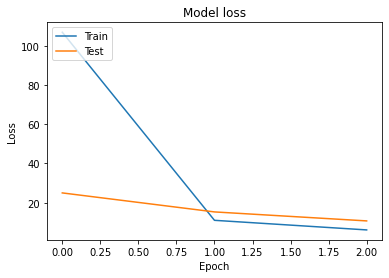

In [36]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##**Testing on user data**

In [42]:
sentence ="Expanding the Possibilities for Learners Ages 16+. Ensure your students are equipped with the English-language skills to succeed globally, expand their opportunities and strengthen your institution's reputation."
sequence = tokenizer.texts_to_sequences([sentence])[0]
sequence=pad_sequences([sequence],maxlen=60000,padding='pre')
k=clf.predict(sequence)
if(k==0):
  print("Your grade is 0")
if(k==1):
  print("Your grade is 1")
if(k==2):
  print("Your grade is 2")
if(k==3):
  print("Your grade is 3")
if(k==4):
  print("Your grade is 4")
if(k==5):
  print("Your grade is 5")
if(k==6):
  print("Your grade is 6")

Your grade is 1


In [38]:
sentence ="Expanding the Possibilities for Learners Ages 16+. Ensure your students are equipped with the English-language skills to succeed globally, expand their opportunities and strengthen your institution's reputation."
sequence = tokenizer.texts_to_sequences([sentence])[0]
sequence=pad_sequences([sequence],maxlen=60000,padding='pre')
k=model.predict_classes(sequence)
if(k==0):
  print("Your grade is 0")
if(k==1):
  print("Your grade is 1")
if(k==2):
  print("Your grade is 2")
if(k==3):
  print("Your grade is 3")
if(k==4):
  print("Your grade is 4")
if(k==5):
  print("Your grade is 5")
if(k==6):
  print("Your grade is 6")

Your grade is 2


##**Conclusion**

Random forest performs better than neural network and in future it can be used in web application for grading of essay.